# Pair Programming Estadística III


In [44]:
import pandas as pd
import numpy as np
import pickle
import os
from scipy import stats 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
from scipy.stats import skew
import scipy.stats as st

In [5]:
df_train_sucio = pd.read_csv("../datos/train.csv")
df_train_sucio.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
homogenizar_columnas = {col: col.lower().replace(" ", "_") for col in df_train_sucio}
df_train.rename(columns = homogenizar_columnas, inplace = True)

df_train.head(2)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Los objetivos de hoy son:

1. Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:

In [8]:
df_train['lotarea'].describe().reset_index()

,index,lotarea
0,count,1460.000000
1,mean,10516.828082
2,std,9981.264932
3,min,1300.000000
4,25%,7553.500000
5,50%,9478.500000
6,75%,11601.500000
7,max,215245.000000


In [10]:
df_train['saleprice'].describe().reset_index()

,index,saleprice
0,count,1460.000000
1,mean,180921.195890
2,std,79442.502883
3,min,34900.000000
4,25%,129975.000000
5,50%,163000.000000
6,75%,214000.000000
7,max,755000.000000


In [16]:
df_train['saleprice_bins'] = pd.cut(df_train['saleprice'], bins = (34900, 140000, 450000, 755000), labels= ['Bajo', 'Medio', 'Alto'])
df_train['lotarea_bins'] = pd.cut(df_train['lotarea'], bins = (1200, 8000, 10000, 220000), labels= ['Bajo', 'Medio', 'Alto'])

In [17]:
df_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,saleprice_bins,lotarea_bins
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,Medio,Medio
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,Medio,Medio
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,Medio,Alto
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,Bajo,Medio
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,Medio,Alto


In [18]:
df_train.groupby(['saleprice_bins', 'lotarea_bins'])['id'].count().reset_index()

,saleprice_bins,lotarea_bins,id
0,Bajo,Bajo,241
1,Bajo,Medio,158
2,Bajo,Alto,109
3,Medio,Bajo,189
4,Medio,Medio,253
5,Medio,Alto,495
6,Alto,Bajo,0
7,Alto,Medio,0
8,Alto,Alto,14


In [20]:
suma_valores = df_train['id'].sum()
suma_valores

1066530

In [22]:
df_train['porcentaje'] = df_train['id'] / suma_valores
df_train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,saleprice_bins,lotarea_bins,porcentaje
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,Medio,Medio,9.376201e-07
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,Medio,Medio,1.875240e-06
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,Medio,Alto,2.812860e-06
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,Bajo,Medio,3.750481e-06
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,Medio,Alto,4.688101e-06


- Tabla de contingencia

In [25]:
df_train_crosstab = pd.crosstab(df_train['saleprice_bins'], 
                            df_train['lotarea_bins']) 

df_train_crosstab

lotarea_bins,Bajo,Medio,Alto
saleprice_bins,,,
Bajo,241,158,109
Medio,189,253,495
Alto,0,0,14


- Coeficiente de correlación de las variables numéricas del dataset.

In [30]:
df_matriz_corr = df_train.corr()
df_matriz_corr.head()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,porcentaje
id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917,1.000000
mssubclass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,0.011156
lotfrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799,-0.010601
lotarea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,-0.033226
overallqual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,-0.028365


In [41]:
# doble corchete para sacar solo las columnas que necesitamos

df_train_seleccion = df_train[['id', 'mssubclass','yearbuilt','lotarea','yrsold','saleprice']]
df_train_seleccion.head()

,id,mssubclass,yearbuilt,lotarea,yrsold,saleprice
0,1,60,2003,8450,2008,208500
1,2,20,1976,9600,2007,181500
2,3,60,2001,11250,2008,223500
3,4,70,1915,9550,2006,140000
4,5,60,2000,14260,2008,250000


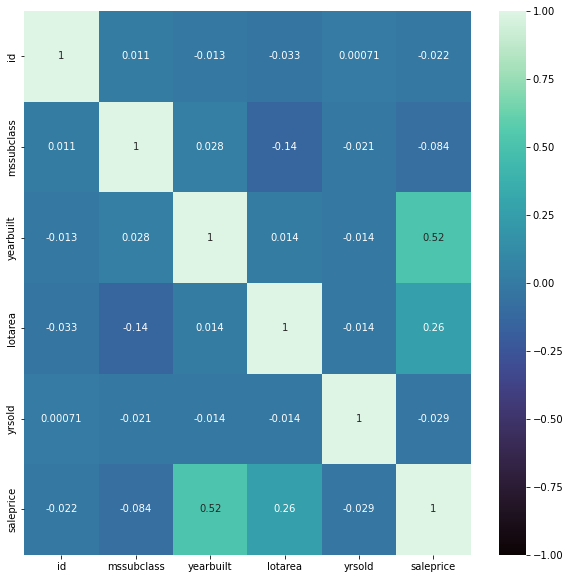

In [42]:
# creamos la gráfica

plt.figure(figsize = (10,10))

sns.heatmap(df_train_seleccion.corr(),
            cmap = "mako",
            annot = True, # para que nos aparezcan los valores de la correlacion
            vmin = -1, 
            vmax = 1
);

### Interpretacion 

- 0 Nula

- 0   – 0.2 Muy baja

- 0.2 – 0.4 Baja

- 0.4 – 0.6 Moderada

- 0.6 – 0.8 Alta

- 0.8 – <1 Muy alta

- 1 Perfecta

saleprice y lotarea corr baja de 0.26

- Sesgos de alguna de las variables numéricas del dataset.

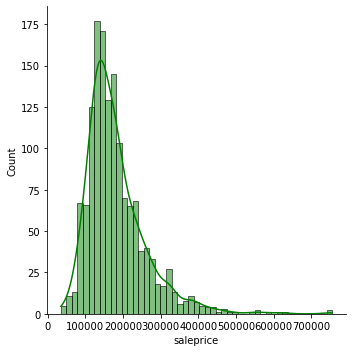

In [45]:
sns.displot(df_train["saleprice"], # sobre que columna queremos hacer la gráfica
            color = "green", # que color le queremos poner a la gráfica
            kde = True);# para que nos visualice la línea de tendencia


In [46]:
skewness = skew(df_train['saleprice'])
print(f"El valor del sesgo para la variable price es: {skewness}")

El valor del sesgo para la variable price es: 1.880940746034036


- Intervalo de confianza de algunas de las variables numéricas del dataset

In [47]:
datos_train = df_train['saleprice']

print(st.t.interval(alpha=0.95, df=len(datos_train)-1, loc=np.mean(datos_train), scale=st.sem(datos_train)))

# Lo comparamos con la media obtenido de los datos disponibles hasta el momento

print(np.mean(datos_train))

(176842.84104108496, 184999.55073973694)
180921.19589041095


Interpretación de los resultados.

- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.